# <p style="font-family: Fantasy, fantasy; line-height: 3.3; font-size: 40px; letter-spacing: 5px; text-align: center; color: #4d4dff">Detecting FRAUD transactions of ETHEREUM</p>
![](https://miro.medium.com/max/1000/1*Jg_EBfBl8yOa6r1i9pCMEw.png)

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Libraries</p>

In [2]:
# Running Machine Learning Models on dataset2 with 80:20 ratio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
import pickle

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data Reading</p>

In [2]:
#df = pd.read_csv('../input/ethereum-frauddetection-dataset/transaction_dataset.csv', index_col=0)
df = pd.read_csv('../input/ethereum-fraud-dataset/eth_illicit_features.csv', index_col=0)
print(df.shape)
df.head()

(12146, 33)


,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1,0.0,2387389.0,5.807655e+04,89.0,1.501076e+09,7.148260e+07,46,66,21,...,0.291940,10,60,0.313433,0.750000,0.238636,0.969121,0.888782,1.891304,147.701484
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,0.0,0.0,0.000000e+00,3021091.0,1.502802e+09,7.529115e+08,35,0,2,...,0.013541,2,1,2.000000,0.000000,0.666667,0.000000,0.238480,0.057143,0.005000
0x00e01a648ff41346cdeb873182383333d2184dd1,1,37.0,25112882.0,1.710279e+06,0.0,1.500397e+09,6.820612e+07,299,15,22,...,0.266494,14,16,1.375000,0.394737,0.578947,0.465450,0.614205,0.123746,52.129575
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,0.0,642460.0,1.576106e+04,0.0,1.500037e+09,1.352571e+07,36,109,111,...,0.007419,36,67,1.009091,0.493213,0.502262,0.957906,0.794121,6.111111,233.689231
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,0.0,0.0,0.000000e+00,3894.0,1.500402e+09,3.751409e+08,82,1,4,...,0.002199,3,3,2.000000,0.166667,0.666667,0.000000,0.406556,0.060976,0.757788


In [3]:
df.describe()

,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
count,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,...,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,12146.000000,1.214600e+04
mean,0.424008,2.649065e+04,4.270947e+07,3.648564e+06,2.499426e+05,1.162226e+09,1.601823e+08,191.749630,517.366787,678.387617,...,-1.367650e+02,85.492343,209.392393,581.427949,0.458685,0.452111,4.341055e-01,4.104000e-01,64.605495,6.970988e+02
std,0.494212,7.167752e+05,2.510061e+08,4.121296e+07,3.403948e+06,7.159138e+08,2.329373e+08,299.970482,1875.017481,2253.808922,...,6.582241e+04,172.709068,974.655740,2206.404201,0.332333,0.317690,3.745526e-01,3.009740e-01,543.602564,2.432648e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,-5.348493e+06,1.000000,1.000000,0.000000,0.000000,0.000000,-6.735319e-17,-9.316840e-17,0.001145,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.794640e+06,8.564709e+04,9.000000,1.000000,3.000000,...,-3.532467e-01,3.000000,2.000000,0.230311,0.142857,0.186526,0.000000e+00,9.707937e-02,0.277778,8.364961e-02
50%,0.000000,0.000000e+00,2.042395e+05,1.490919e+04,4.800000e+01,1.578994e+09,4.776982e+07,68.000000,6.000000,11.000000,...,1.563244e-03,15.000000,5.000000,0.620312,0.454545,0.375000,4.940496e-01,4.459279e-01,1.080336,9.335405e-01
75%,1.000000,8.000000e+01,1.845179e+06,1.391289e+05,7.147500e+02,1.640623e+09,2.192212e+08,251.000000,70.000000,55.000000,...,4.064367e-02,85.000000,24.000000,2.741071,0.773654,0.714286,8.008659e-01,6.347963e-01,4.000000,6.826739e+00
max,1.000000,6.198813e+07,1.658260e+09,8.291299e+08,1.508562e+08,1.658260e+09,8.309932e+08,2293.000000,10000.000000,10000.000000,...,1.847901e+06,1912.000000,10000.000000,10000.000000,0.999900,0.999900,9.998963e-01,9.998940e-01,10000.000000,2.038484e+06


In [4]:
df.var()

flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDays               2.982842e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  min

In [6]:
# Ommit first two columns (Index, Adress)
#df = df.iloc[:,2:]

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data information & exploration</p>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  min

In [8]:
# Turn object variables into 'category' dtype for more computation efficiency
categories = df.select_dtypes('O').columns.astype('category')
df[categories]

""
address
0xd0cc2b24980cbcca47ef755da88b220a82291407
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1
0x00e01a648ff41346cdeb873182383333d2184dd1
0x858457daa7e087ad74cdeeceab8419079bc2ca03
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d
...
0x38e404b6ca4549988ced1d065330f1f722787924
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012


In [9]:
# Inspect categoricals
for i in df[categories].columns:
    print(f'The categorical column --{i}-- has --{len(df[i].value_counts())}-- unique values')

In [10]:
# Inspect numericals
numericals = df.select_dtypes(include=['float','int']).columns
df[numericals].describe()

,flag,minTimeBetweenSentTnx,maxTimeBetweenSentTnx,avgTimeBetweenSentTnx,minTimeBetweenRecTnx,maxTimeBetweenRecTnx,avgTimeBetweenRecTnx,lifetime,sentTransactions,receivedTransactions,...,totalEtherBalance,activityDays,dailyMax,ratioRecSent,ratioSentTotal,ratioRecTotal,giniSent,giniRec,txFreq,stdBalanceEth
count,12146.000000,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,1.214600e+04,12146.000000,12146.000000,12146.000000,...,1.214600e+04,12146.000000,12146.000000,12146.000000,12146.000000,12146.000000,1.214600e+04,1.214600e+04,12146.000000,1.214600e+04
mean,0.424008,2.649065e+04,4.270947e+07,3.648564e+06,2.499426e+05,1.162226e+09,1.601823e+08,191.749630,517.366787,678.387617,...,-1.367650e+02,85.492343,209.392393,581.427949,0.458685,0.452111,4.341055e-01,4.104000e-01,64.605495,6.970988e+02
std,0.494212,7.167752e+05,2.510061e+08,4.121296e+07,3.403948e+06,7.159138e+08,2.329373e+08,299.970482,1875.017481,2253.808922,...,6.582241e+04,172.709068,974.655740,2206.404201,0.332333,0.317690,3.745526e-01,3.009740e-01,543.602564,2.432648e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,-5.348493e+06,1.000000,1.000000,0.000000,0.000000,0.000000,-6.735319e-17,-9.316840e-17,0.001145,0.000000e+00
25%,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.794640e+06,8.564709e+04,9.000000,1.000000,3.000000,...,-3.532467e-01,3.000000,2.000000,0.230311,0.142857,0.186526,0.000000e+00,9.707937e-02,0.277778,8.364961e-02
50%,0.000000,0.000000e+00,2.042395e+05,1.490919e+04,4.800000e+01,1.578994e+09,4.776982e+07,68.000000,6.000000,11.000000,...,1.563244e-03,15.000000,5.000000,0.620312,0.454545,0.375000,4.940496e-01,4.459279e-01,1.080336,9.335405e-01
75%,1.000000,8.000000e+01,1.845179e+06,1.391289e+05,7.147500e+02,1.640623e+09,2.192212e+08,251.000000,70.000000,55.000000,...,4.064367e-02,85.000000,24.000000,2.741071,0.773654,0.714286,8.008659e-01,6.347963e-01,4.000000,6.826739e+00
max,1.000000,6.198813e+07,1.658260e+09,8.291299e+08,1.508562e+08,1.658260e+09,8.309932e+08,2293.000000,10000.000000,10000.000000,...,1.847901e+06,1912.000000,10000.000000,10000.000000,0.999900,0.999900,9.998963e-01,9.998940e-01,10000.000000,2.038484e+06


In [11]:
# Inspect features variance
df[numericals].var()

flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDays               2.982842e+04


0    6996
1    5150
Name: flag, dtype: int64


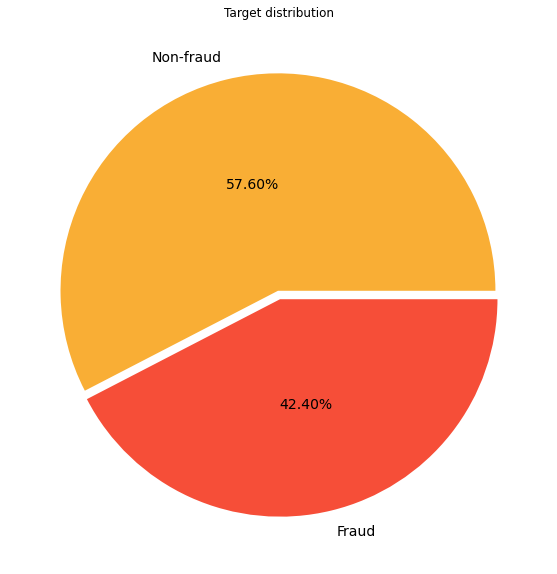

In [12]:
# Inspect target distribution
print(df['flag'].value_counts())

pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['flag'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

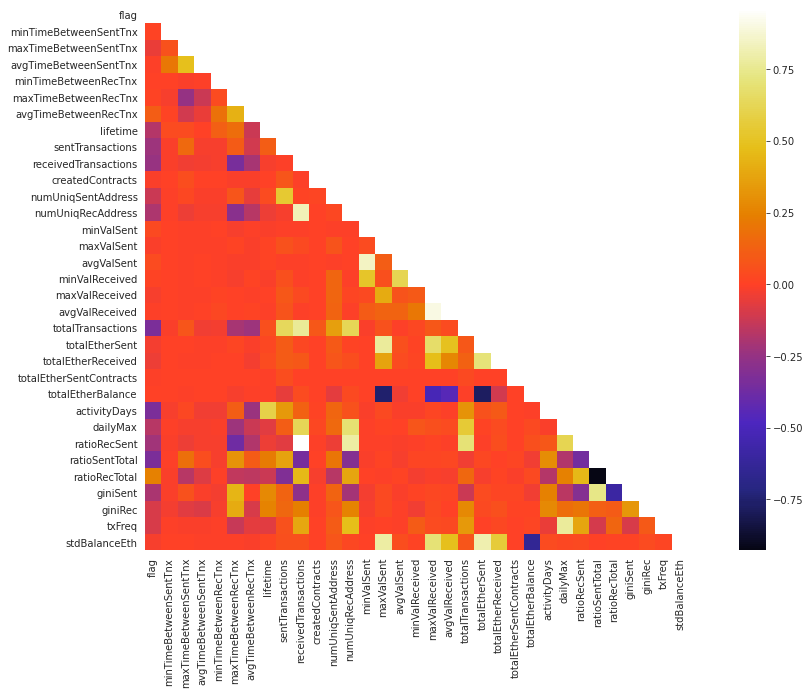

In [13]:
# Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, square=True)

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data cleaning</p>

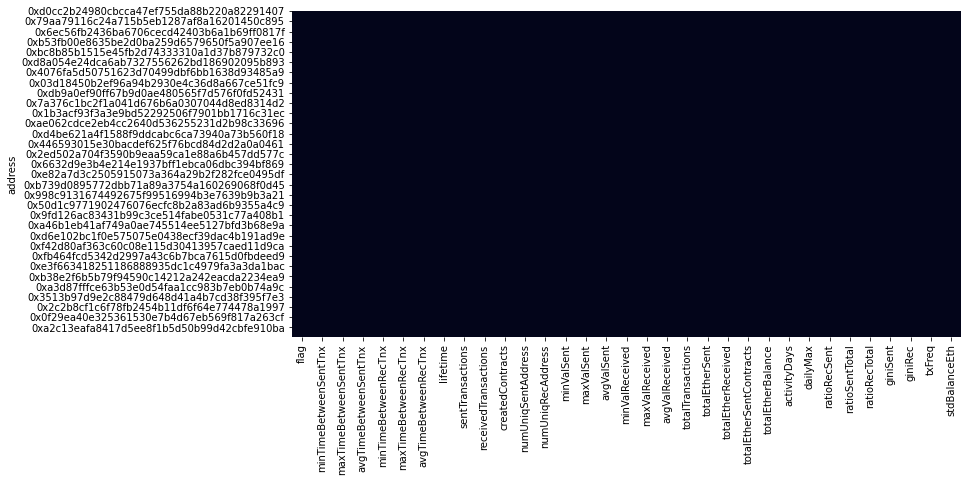

In [14]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [15]:
# Drop the two categorical features
df.drop(df[categories], axis=1, inplace=True)

In [16]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

(12146, 33)


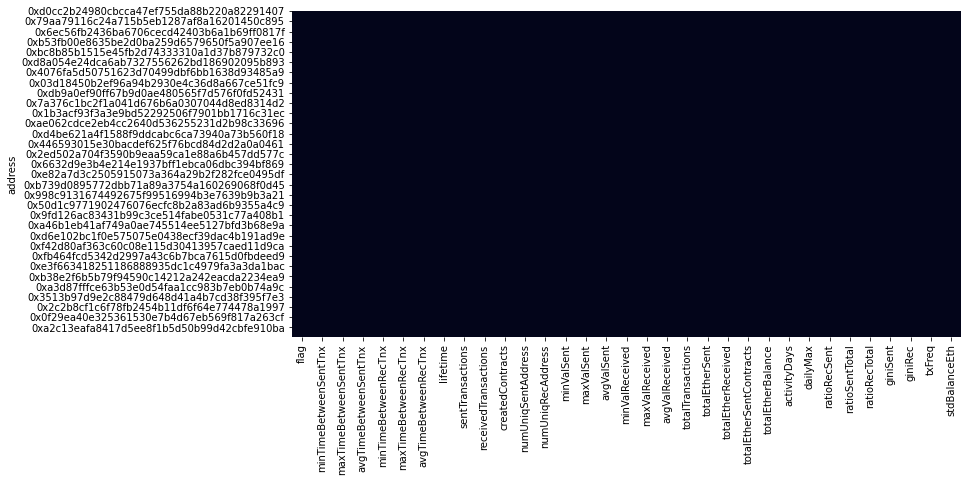

In [17]:
# Visualize missings pattern of the dataframe
print(df.shape)
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Investigating the variance of the features, it was observed that there are some features with a variance = 0

In [18]:
# Filtering the features with 0 variance
no_var = df.var() == 0
print(df.var()[no_var])
print('\n')

# Drop features with 0 variance --- these features will not help in the performance of the model
df.drop(df.var()[no_var].index, axis = 1, inplace = True)
print(df.var())
print(df.shape)

Series([], dtype: float64)


flag                       2.442453e-01
minTimeBetweenSentTnx      5.137667e+11
maxTimeBetweenSentTnx      6.300406e+16
avgTimeBetweenSentTnx      1.698508e+15
minTimeBetweenRecTnx       1.158686e+13
maxTimeBetweenRecTnx       5.125326e+17
avgTimeBetweenRecTnx       5.425980e+16
lifetime                   8.998229e+04
sentTransactions           3.515691e+06
receivedTransactions       5.079655e+06
createdContracts           1.114207e+04
numUniqSentAddress         3.881016e+05
numUniqRecAddress          1.265501e+06
minValSent                 6.139942e+04
maxValSent                 3.659123e+07
avgValSent                 8.773704e+04
minValReceived             2.448074e+05
maxValReceived             6.729808e+07
avgValReceived             7.119741e+06
totalTransactions          8.617149e+06
totalEtherSent             8.585796e+09
totalEtherReceived         3.390950e+09
totalEtherSentContracts    1.254558e-01
totalEtherBalance          4.332590e+09
activityDay

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12146 entries, 0xd0cc2b24980cbcca47ef755da88b220a82291407 to 0x53d5d85e9a67fc0178a5216fdedde4050a82693e
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flag                     12146 non-null  int64  
 1   minTimeBetweenSentTnx    12146 non-null  float64
 2   maxTimeBetweenSentTnx    12146 non-null  float64
 3   avgTimeBetweenSentTnx    12146 non-null  float64
 4   minTimeBetweenRecTnx     12146 non-null  float64
 5   maxTimeBetweenRecTnx     12146 non-null  float64
 6   avgTimeBetweenRecTnx     12146 non-null  float64
 7   lifetime                 12146 non-null  int64  
 8   sentTransactions         12146 non-null  int64  
 9   receivedTransactions     12146 non-null  int64  
 10  createdContracts         12146 non-null  int64  
 11  numUniqSentAddress       12146 non-null  int64  
 12  numUniqRecAddress        12146 non-null  int64  
 13  min

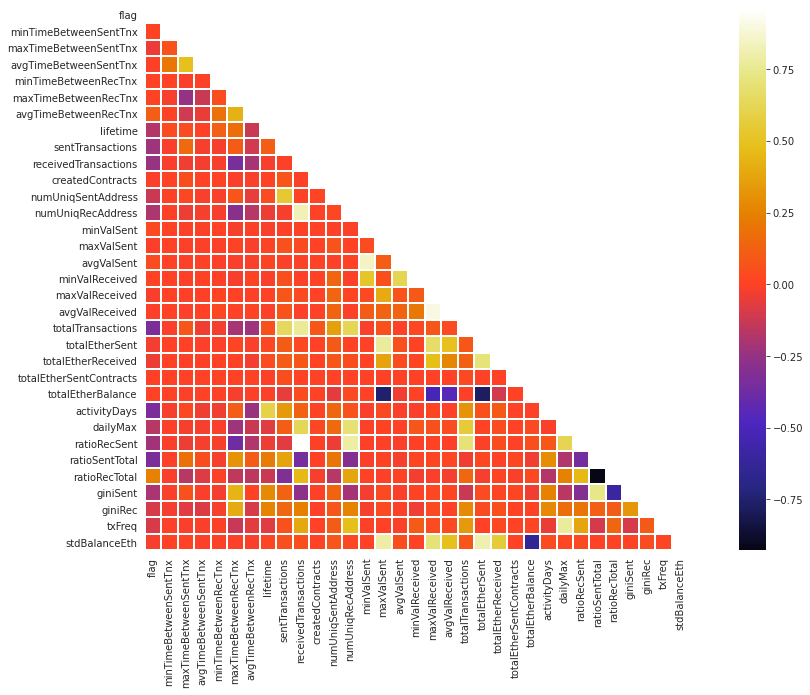

In [20]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [21]:
df.columns

Index(['flag', 'minTimeBetweenSentTnx', 'maxTimeBetweenSentTnx',
       'avgTimeBetweenSentTnx', 'minTimeBetweenRecTnx', 'maxTimeBetweenRecTnx',
       'avgTimeBetweenRecTnx', 'lifetime', 'sentTransactions',
       'receivedTransactions', 'createdContracts', 'numUniqSentAddress',
       'numUniqRecAddress', 'minValSent', 'maxValSent', 'avgValSent',
       'minValReceived', 'maxValReceived', 'avgValReceived',
       'totalTransactions', 'totalEtherSent', 'totalEtherReceived',
       'totalEtherSentContracts', 'totalEtherBalance', 'activityDays',
       'dailyMax', 'ratioRecSent', 'ratioSentTotal', 'ratioRecTotal',
       'giniSent', 'giniRec', 'txFreq', 'stdBalanceEth'],
      dtype='object')

In [22]:
col_list = list(df.columns)
col_list

['flag',
 'minTimeBetweenSentTnx',
 'maxTimeBetweenSentTnx',
 'avgTimeBetweenSentTnx',
 'minTimeBetweenRecTnx',
 'maxTimeBetweenRecTnx',
 'avgTimeBetweenRecTnx',
 'lifetime',
 'sentTransactions',
 'receivedTransactions',
 'createdContracts',
 'numUniqSentAddress',
 'numUniqRecAddress',
 'minValSent',
 'maxValSent',
 'avgValSent',
 'minValReceived',
 'maxValReceived',
 'avgValReceived',
 'totalTransactions',
 'totalEtherSent',
 'totalEtherReceived',
 'totalEtherSentContracts',
 'totalEtherBalance',
 'activityDays',
 'dailyMax',
 'ratioRecSent',
 'ratioSentTotal',
 'ratioRecTotal',
 'giniSent',
 'giniRec',
 'txFreq',
 'stdBalanceEth']

Drop one of those highly correlated features
    

In [23]:
drop = ['totalEtherSentContracts', 'maxValSent', 'avgValReceived',
        'avgValReceived', 'maxValReceived', 'minValReceived', 'numUniqRecAddress', 'maxValSent', 'avgValSent',
        'minValSent', 'maxValSent', 'totalTransactions', 'avgValSent', 'numUniqSentAddress',
        'numUniqRecAddress', 'totalEtherReceived', 'minValReceived', 'minValSent', 'numUniqRecAddress']
# df.drop(drop, axis=1, inplace=True)

In [24]:
new_col_list = list(set(col_list).difference(set(drop)))
df = df[new_col_list]
df

,ratioSentTotal,stdBalanceEth,totalEtherSent,giniRec,avgTimeBetweenRecTnx,maxTimeBetweenSentTnx,totalEtherBalance,giniSent,txFreq,flag,...,dailyMax,minTimeBetweenRecTnx,ratioRecTotal,minTimeBetweenSentTnx,sentTransactions,ratioRecSent,receivedTransactions,activityDays,avgTimeBetweenSentTnx,lifetime
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,0.750000,147.701484,366.921190,0.888782,7.148260e+07,2387389.0,0.291940,0.969121,1.891304,1,...,60,89.0,0.238636,0.0,66,0.313433,21,10,5.807655e+04,46
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,0.000000,0.005000,0.000000,0.238480,7.529115e+08,0.0,0.013541,0.000000,0.057143,1,...,1,3021091.0,0.666667,0.0,0,2.000000,2,2,0.000000e+00,35
0x00e01a648ff41346cdeb873182383333d2184dd1,0.394737,52.129575,199.950000,0.614205,6.820612e+07,25112882.0,0.266494,0.465450,0.123746,1,...,16,0.0,0.578947,37.0,15,1.375000,22,14,1.710279e+06,299
0x858457daa7e087ad74cdeeceab8419079bc2ca03,0.493213,233.689231,1630.570000,0.794121,1.352571e+07,642460.0,0.007419,0.957906,6.111111,1,...,67,0.0,0.502262,0.0,109,1.009091,111,36,1.576106e+04,36
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,0.166667,0.757788,1.900000,0.406556,3.751409e+08,0.0,0.002199,0.000000,0.060976,1,...,3,3894.0,0.666667,0.0,1,2.000000,4,3,0.000000e+00,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,0.500000,0.236468,3.094515,0.615051,1.275572e+08,15139.0,0.009248,0.643490,1.080000,0,...,4,698.0,0.464286,3.0,14,0.866667,13,24,1.186571e+03,25
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0.850000,0.617016,16.220988,0.289923,8.295712e+07,411419.0,-1.600064,0.856372,0.932886,0,...,3,0.0,0.142857,0.0,119,0.166667,20,136,2.206761e+04,149
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0.000000,0.000000,0.000000,0.000000,7.712044e+03,0.0,0.000000,0.000000,11.020833,0,...,296,0.0,0.996226,0.0,0,528.000000,528,41,0.000000e+00,48


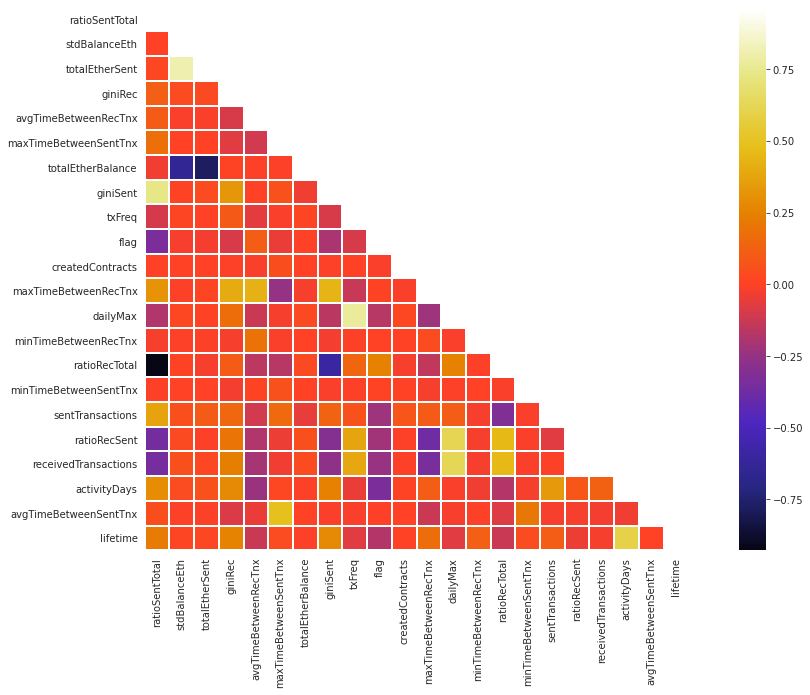

In [25]:
# Recheck the Correlation matrix
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,10))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='CMRmap', center=0, linewidths=0.1, square=True)

In [26]:
columns = df.columns
columns

Index(['ratioSentTotal', 'stdBalanceEth', 'totalEtherSent', 'giniRec',
       'avgTimeBetweenRecTnx', 'maxTimeBetweenSentTnx', 'totalEtherBalance',
       'giniSent', 'txFreq', 'flag', 'createdContracts',
       'maxTimeBetweenRecTnx', 'dailyMax', 'minTimeBetweenRecTnx',
       'ratioRecTotal', 'minTimeBetweenSentTnx', 'sentTransactions',
       'ratioRecSent', 'receivedTransactions', 'activityDays',
       'avgTimeBetweenSentTnx', 'lifetime'],
      dtype='object')

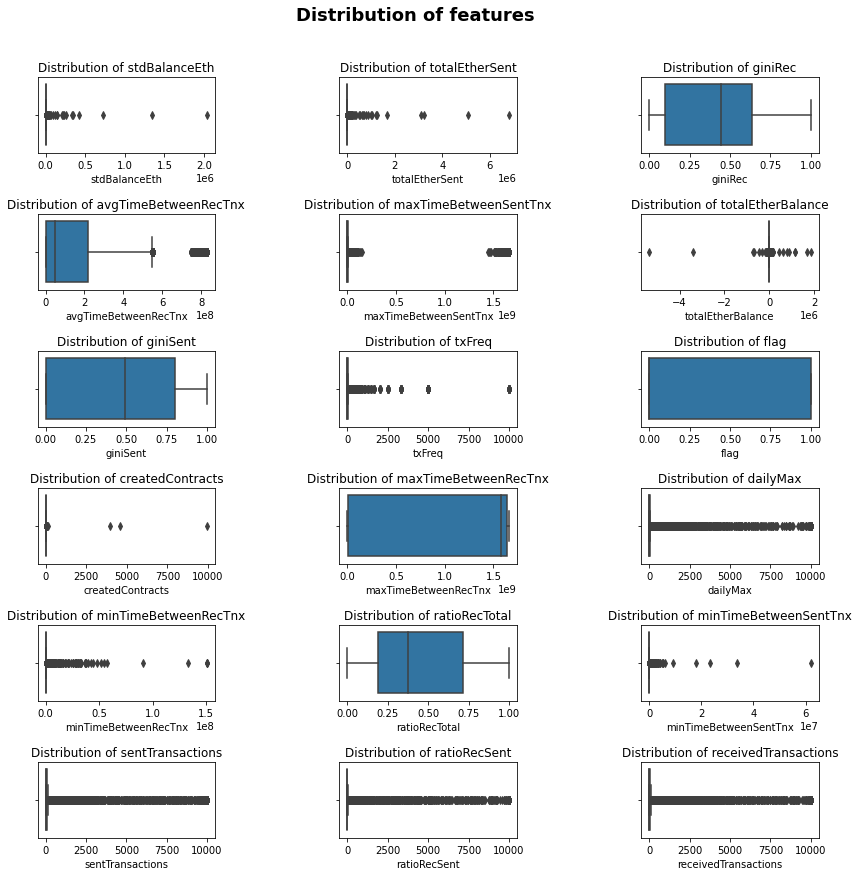

In [27]:
# Investigate the distribution of our features using boxplots
b=20

fig, axes = plt.subplots(6, 3, figsize=(14, 14), constrained_layout =True)
plt.subplots_adjust(wspace = 0.7, hspace=0.8)
plt.suptitle("Distribution of features",y=0.95, size=18, weight='bold')

ax = sns.boxplot(ax = axes[0,0], data=df, x=columns[1])
ax.set_title(f'Distribution of {columns[1]}')

ax1 = sns.boxplot(ax = axes[0,1], data=df, x=columns[2])
ax1.set_title(f'Distribution of {columns[2]}')

ax2 = sns.boxplot(ax = axes[0,2], data=df, x=columns[3])
ax2.set_title(f'Distribution of {columns[3]}')

ax3 = sns.boxplot(ax = axes[1,0], data=df, x=columns[4])
ax3.set_title(f'Distribution of {columns[4]}')

ax4 = sns.boxplot(ax = axes[1,1], data=df, x=columns[5])
ax4.set_title(f'Distribution of {columns[5]}')

ax5 = sns.boxplot(ax = axes[1,2], data=df, x=columns[6])
ax5.set_title(f'Distribution of {columns[6]}')

ax6 = sns.boxplot(ax = axes[2,0], data=df, x=columns[7])
ax6.set_title(f'Distribution of {columns[7]}')

ax7 = sns.boxplot(ax = axes[2,1], data=df, x=columns[8])
ax7.set_title(f'Distribution of {columns[8]}')

ax8 = sns.boxplot(ax = axes[2,2], data=df, x=columns[9])
ax8.set_title(f'Distribution of {columns[9]}')

ax9 = sns.boxplot(ax = axes[3,0], data=df, x=columns[10])
ax9.set_title(f'Distribution of {columns[10]}')
 
ax10 = sns.boxplot(ax = axes[3,1], data=df, x=columns[11])
ax10.set_title(f'Distribution of {columns[11]}')

ax11 = sns.boxplot(ax = axes[3,2], data=df, x=columns[12])
ax11.set_title(f'Distribution of {columns[12]}')
 
ax12 = sns.boxplot(ax = axes[4,0], data=df, x=columns[13])
ax12.set_title(f'Distribution of {columns[13]}')
 
ax13 = sns.boxplot(ax = axes[4,1], data=df, x=columns[14])
ax13.set_title(f'Distribution of {columns[14]}')
 
ax14 = sns.boxplot(ax = axes[4,2], data=df, x=columns[15])
ax14.set_title(f'Distribution of {columns[15]}')
 
ax15 = sns.boxplot(ax = axes[5,0], data=df, x=columns[16])
ax15.set_title(f'Distribution of {columns[16]}')
 
ax16 = sns.boxplot(ax = axes[5,1], data=df, x=columns[17])
ax16.set_title(f'Distribution of {columns[17]}')
 
ax17 = sns.boxplot(ax = axes[5,2], data=df, x=columns[18])
ax17.set_title(f'Distribution of {columns[18]}')

plt.show()

In [28]:
# Some features present a small distribution
for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column flag has the following distribution: 
0    6996
1    5150
Name: flag, dtype: int64


In [29]:
drops = ['minValSent', 'numUniqSentAddress']

In [30]:
new_col_list = list(set(columns).difference(set(drops)))
df = df[new_col_list]
df

,txFreq,ratioSentTotal,flag,stdBalanceEth,createdContracts,totalEtherSent,maxTimeBetweenRecTnx,dailyMax,giniRec,avgTimeBetweenSentTnx,...,avgTimeBetweenRecTnx,maxTimeBetweenSentTnx,minTimeBetweenSentTnx,sentTransactions,ratioRecSent,totalEtherBalance,receivedTransactions,activityDays,giniSent,lifetime
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1.891304,0.750000,1,147.701484,0,366.921190,1.501076e+09,60,0.888782,5.807655e+04,...,7.148260e+07,2387389.0,0.0,66,0.313433,0.291940,21,10,0.969121,46
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,0.057143,0.000000,1,0.005000,0,0.000000,1.502802e+09,1,0.238480,0.000000e+00,...,7.529115e+08,0.0,0.0,0,2.000000,0.013541,2,2,0.000000,35
0x00e01a648ff41346cdeb873182383333d2184dd1,0.123746,0.394737,1,52.129575,0,199.950000,1.500397e+09,16,0.614205,1.710279e+06,...,6.820612e+07,25112882.0,37.0,15,1.375000,0.266494,22,14,0.465450,299
0x858457daa7e087ad74cdeeceab8419079bc2ca03,6.111111,0.493213,1,233.689231,0,1630.570000,1.500037e+09,67,0.794121,1.576106e+04,...,1.352571e+07,642460.0,0.0,109,1.009091,0.007419,111,36,0.957906,36
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,0.060976,0.166667,1,0.757788,0,1.900000,1.500402e+09,3,0.406556,0.000000e+00,...,3.751409e+08,0.0,0.0,1,2.000000,0.002199,4,3,0.000000,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,1.080000,0.500000,0,0.236468,0,3.094515,1.656129e+09,4,0.615051,1.186571e+03,...,1.275572e+08,15139.0,3.0,14,0.866667,0.009248,13,24,0.643490,25
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0.932886,0.850000,0,0.617016,0,16.220988,1.648939e+09,3,0.289923,2.206761e+04,...,8.295712e+07,411419.0,0.0,119,0.166667,-1.600064,20,136,0.856372,149
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,11.020833,0.000000,0,0.000000,1,0.000000,4.086570e+05,296,0.000000,0.000000e+00,...,7.712044e+03,0.0,0.0,0,528.000000,0.000000,528,41,0.000000,48


It can be observed that the values of these two variables are mosty 0s. Thus, both features will be discarded since they will not be helpful for our model

In [31]:
# df.drop(drops, axis=1, inplace=True)
print(df.shape)
df.head()

(12146, 22)


,txFreq,ratioSentTotal,flag,stdBalanceEth,createdContracts,totalEtherSent,maxTimeBetweenRecTnx,dailyMax,giniRec,avgTimeBetweenSentTnx,...,avgTimeBetweenRecTnx,maxTimeBetweenSentTnx,minTimeBetweenSentTnx,sentTransactions,ratioRecSent,totalEtherBalance,receivedTransactions,activityDays,giniSent,lifetime
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1.891304,0.750000,1,147.701484,0,366.92119,1.501076e+09,60,0.888782,5.807655e+04,...,7.148260e+07,2387389.0,0.0,66,0.313433,0.291940,21,10,0.969121,46
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,0.057143,0.000000,1,0.005000,0,0.00000,1.502802e+09,1,0.238480,0.000000e+00,...,7.529115e+08,0.0,0.0,0,2.000000,0.013541,2,2,0.000000,35
0x00e01a648ff41346cdeb873182383333d2184dd1,0.123746,0.394737,1,52.129575,0,199.95000,1.500397e+09,16,0.614205,1.710279e+06,...,6.820612e+07,25112882.0,37.0,15,1.375000,0.266494,22,14,0.465450,299
0x858457daa7e087ad74cdeeceab8419079bc2ca03,6.111111,0.493213,1,233.689231,0,1630.57000,1.500037e+09,67,0.794121,1.576106e+04,...,1.352571e+07,642460.0,0.0,109,1.009091,0.007419,111,36,0.957906,36
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,0.060976,0.166667,1,0.757788,0,1.90000,1.500402e+09,3,0.406556,0.000000e+00,...,3.751409e+08,0.0,0.0,1,2.000000,0.002199,4,3,0.000000,82


<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Data preparation</p>

In [32]:
ordered_list = ['flag', 'dailyMax', 'lifetime', 'ratioRecSent', 'activityDays', 'giniSent',
       'maxTimeBetweenRecTnx', 'createdContracts', 'stdBalanceEth',
       'ratioRecTotal', 'avgTimeBetweenRecTnx', 'sentTransactions',
       'receivedTransactions', 'maxTimeBetweenSentTnx', 'totalEtherBalance',
       'minTimeBetweenRecTnx', 'txFreq', 'avgTimeBetweenSentTnx',
       'minTimeBetweenSentTnx', 'giniRec', 'totalEtherSent', 'ratioSentTotal']
df = df[ordered_list]
df

,flag,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1,60,46,0.313433,10,0.969121,1.501076e+09,0,147.701484,0.238636,...,21,2387389.0,0.291940,89.0,1.891304,5.807655e+04,0.0,0.888782,366.921190,0.750000
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,1,35,2.000000,2,0.000000,1.502802e+09,0,0.005000,0.666667,...,2,0.0,0.013541,3021091.0,0.057143,0.000000e+00,0.0,0.238480,0.000000,0.000000
0x00e01a648ff41346cdeb873182383333d2184dd1,1,16,299,1.375000,14,0.465450,1.500397e+09,0,52.129575,0.578947,...,22,25112882.0,0.266494,0.0,0.123746,1.710279e+06,37.0,0.614205,199.950000,0.394737
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,67,36,1.009091,36,0.957906,1.500037e+09,0,233.689231,0.502262,...,111,642460.0,0.007419,0.0,6.111111,1.576106e+04,0.0,0.794121,1630.570000,0.493213
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,3,82,2.000000,3,0.000000,1.500402e+09,0,0.757788,0.666667,...,4,0.0,0.002199,3894.0,0.060976,0.000000e+00,0.0,0.406556,1.900000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,0,4,25,0.866667,24,0.643490,1.656129e+09,0,0.236468,0.464286,...,13,15139.0,0.009248,698.0,1.080000,1.186571e+03,3.0,0.615051,3.094515,0.500000
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0,3,149,0.166667,136,0.856372,1.648939e+09,0,0.617016,0.142857,...,20,411419.0,-1.600064,0.0,0.932886,2.206761e+04,0.0,0.289923,16.220988,0.850000
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0,296,48,528.000000,41,0.000000,4.086570e+05,1,0.000000,0.996226,...,528,0.0,0.000000,0.0,11.020833,0.000000e+00,0.0,0.000000,0.000000,0.000000


In [33]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
print(X.shape, y.shape)

(12146, 21) (12146,)


In [34]:
y

address
0xd0cc2b24980cbcca47ef755da88b220a82291407    1
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1    1
0x00e01a648ff41346cdeb873182383333d2184dd1    1
0x858457daa7e087ad74cdeeceab8419079bc2ca03    1
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d    1
                                             ..
0x38e404b6ca4549988ced1d065330f1f722787924    0
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979    0
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012    0
0x0cd3724542af4be8243eba3f560c0c55c5abd1df    0
0x53d5d85e9a67fc0178a5216fdedde4050a82693e    0
Name: flag, Length: 12146, dtype: int64

In [35]:
df.columns

Index(['flag', 'dailyMax', 'lifetime', 'ratioRecSent', 'activityDays',
       'giniSent', 'maxTimeBetweenRecTnx', 'createdContracts', 'stdBalanceEth',
       'ratioRecTotal', 'avgTimeBetweenRecTnx', 'sentTransactions',
       'receivedTransactions', 'maxTimeBetweenSentTnx', 'totalEtherBalance',
       'minTimeBetweenRecTnx', 'txFreq', 'avgTimeBetweenSentTnx',
       'minTimeBetweenSentTnx', 'giniRec', 'totalEtherSent', 'ratioSentTotal'],
      dtype='object')

In [36]:
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9716, 21) (9716,)
(2430, 21) (2430,)


In [37]:
# Normalize the training features
norm = PowerTransformer()
norm_train_f = norm.fit_transform(X_train)

In [38]:
norm_df = pd.DataFrame(norm_train_f, columns=X_train.columns)
norm_df

,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,avgTimeBetweenRecTnx,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
0,0.297432,2.160839,1.915753,2.102988,0.708963,0.572549,-0.405499,1.674452,1.510511,-0.741986,...,1.793187,1.097932,-0.009335,0.412883,0.277631,0.904111,-0.817848,-1.152751,1.739623,-1.400729
1,-0.336660,-0.381196,0.100292,-0.758195,0.484675,0.566594,-0.405499,1.873259,0.453906,0.900307,...,-0.489419,0.762364,-0.011463,0.794114,-0.882730,1.126796,1.150455,0.806252,1.819654,-0.315793
2,-0.336660,1.337603,-0.680969,1.239925,1.057256,0.609475,-0.405499,0.840766,-0.608680,0.203034,...,0.650023,0.740164,-0.009959,0.194159,-0.840542,0.740420,-0.817848,0.341619,0.888912,0.909740
3,-0.861714,-0.964949,-0.049369,-1.121982,-1.177094,0.598221,-0.405499,1.190310,0.290078,1.301242,...,-1.023771,-1.314021,-0.009696,0.932409,-0.720485,-1.306155,-0.817848,0.225598,0.958695,-0.580445
4,1.603492,0.575409,2.102999,1.188740,-1.177094,0.617864,-0.405499,1.935166,1.530713,-0.873750,...,1.909159,-1.314021,0.111916,-1.080743,1.750427,-1.306155,-0.817848,1.526459,-1.149277,-1.435799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9711,-1.357674,-1.378651,0.423767,-1.121982,-1.177094,0.623436,-0.405499,-1.102069,0.759046,1.323984,...,-1.023771,-1.314021,-0.009696,1.607711,-0.224645,-1.306155,-0.817848,-1.389193,-1.149277,-1.435799
9712,1.800476,0.248533,2.102998,0.924714,-1.177094,-1.453444,2.465309,-1.101349,1.530508,-1.381722,...,1.909148,-1.314021,-0.009696,-1.080743,1.839718,-1.306155,-0.817848,1.435498,-1.149277,-1.435799
9713,-0.172669,-0.010701,1.276240,0.325431,0.661749,0.588090,-0.405499,1.184185,1.307122,0.272432,...,0.520234,0.813446,-0.009696,0.439881,-0.496968,1.152787,1.283331,1.120224,1.055290,-1.154584
9714,0.573993,0.032908,0.340425,0.634364,0.060767,0.621860,-0.405499,-0.790718,0.686331,-0.006561,...,0.949214,0.271242,-0.009695,0.134630,0.421005,0.196363,1.028518,-0.027238,0.775402,-0.250188


In [39]:
df

,flag,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1,60,46,0.313433,10,0.969121,1.501076e+09,0,147.701484,0.238636,...,21,2387389.0,0.291940,89.0,1.891304,5.807655e+04,0.0,0.888782,366.921190,0.750000
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,1,35,2.000000,2,0.000000,1.502802e+09,0,0.005000,0.666667,...,2,0.0,0.013541,3021091.0,0.057143,0.000000e+00,0.0,0.238480,0.000000,0.000000
0x00e01a648ff41346cdeb873182383333d2184dd1,1,16,299,1.375000,14,0.465450,1.500397e+09,0,52.129575,0.578947,...,22,25112882.0,0.266494,0.0,0.123746,1.710279e+06,37.0,0.614205,199.950000,0.394737
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,67,36,1.009091,36,0.957906,1.500037e+09,0,233.689231,0.502262,...,111,642460.0,0.007419,0.0,6.111111,1.576106e+04,0.0,0.794121,1630.570000,0.493213
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,3,82,2.000000,3,0.000000,1.500402e+09,0,0.757788,0.666667,...,4,0.0,0.002199,3894.0,0.060976,0.000000e+00,0.0,0.406556,1.900000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,0,4,25,0.866667,24,0.643490,1.656129e+09,0,0.236468,0.464286,...,13,15139.0,0.009248,698.0,1.080000,1.186571e+03,3.0,0.615051,3.094515,0.500000
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0,3,149,0.166667,136,0.856372,1.648939e+09,0,0.617016,0.142857,...,20,411419.0,-1.600064,0.0,0.932886,2.206761e+04,0.0,0.289923,16.220988,0.850000
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0,296,48,528.000000,41,0.000000,4.086570e+05,1,0.000000,0.996226,...,528,0.0,0.000000,0.0,11.020833,0.000000e+00,0.0,0.000000,0.000000,0.000000


In [40]:
df['flag'].value_counts()

0    6996
1    5150
Name: flag, dtype: int64

<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Handling the imbalance</p>
Oversampling using SMOTE

In [41]:
oversample = SMOTE()
print(f'Shape of the training before SMOTE: {norm_train_f.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(norm_train_f, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((9716, 21), (9716,))
Shape of the training after SMOTE: ((11192, 21), (11192,))


In [42]:
# Target distribution before SMOTE
non_fraud = 0
fraud = 0

for i in y_train:
    if i == 0:
        non_fraud +=1
    else:
        fraud +=1

# Target distribution after SMOTE
no = 0
yes = 1

for j in y_tr_resample:
    if j == 0:
        no +=1
    else:
        yes +=1


print(f'BEFORE OVERSAMPLING \n \tNon-frauds: {non_fraud} \n \tFauds: {fraud}')
print(f'AFTER OVERSAMPLING \n \tNon-frauds: {no} \n \tFauds: {yes}')

BEFORE OVERSAMPLING 
 	Non-frauds: 5596 
 	Fauds: 4120
AFTER OVERSAMPLING 
 	Non-frauds: 5596 
 	Fauds: 5597


<p style="font-family: Fantasy, fantasy; line-height: 1.3;font-size: 30px; letter-spacing: 5px;  color: #4d4dff">Modeling</p>

**Logistic Regression**

In [43]:
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

# Transform test features
norm_test_f = norm.transform(X_test)

preds = LR.predict(norm_test_f)
print(preds)

[1 0 1 ... 0 1 1]


In [44]:
print(y_test.shape)
y_test.value_counts()

(2430,)


0    1400
1    1030
Name: flag, dtype: int64

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1400
           1       0.79      0.82      0.81      1030

    accuracy                           0.83      2430
   macro avg       0.83      0.83      0.83      2430
weighted avg       0.83      0.83      0.83      2430

[[1174  226]
 [ 181  849]]


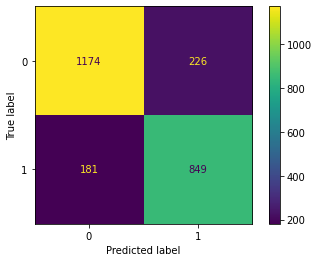

In [45]:
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
plot_confusion_matrix(LR, norm_test_f, y_test)

Considering the confusion matrix:
 - LR model, correctly identified 373 (TP) of FRAUD cases, out of 422 (P).
 - LR model flagged as FRAUD 171 (FP) out of 1547, when this cases were actually NON-FRAUD
 

Dealing with a fraud detection scenario, we care more about the transactions that were actualy FRAUDS, but which were treated as NON-FRAUD by our model (FN - 49) TYPE II ERROR

Therby, let's try to increase the precision using other methods.


**Feature Importance in Logistic Regression**

link:https://stackoverflow.com/questions/66750706/sklearn-important-features-error-when-using-logistic-regression

<AxesSubplot:title={'center':'Feature Importance'}>

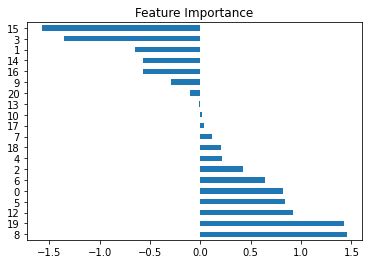

In [46]:
importance = LR.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

**Random Forest Classifier**

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1400
           1       0.92      0.92      0.92      1030

    accuracy                           0.93      2430
   macro avg       0.93      0.93      0.93      2430
weighted avg       0.93      0.93      0.93      2430

[[1315   85]
 [  81  949]]


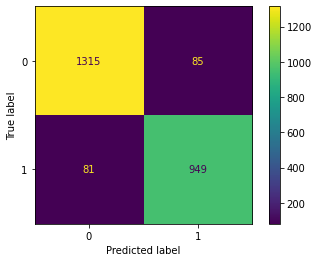

In [47]:
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)
preds_RF = RF.predict(norm_test_f)

print(classification_report(y_test, preds_RF))
print(confusion_matrix(y_test, preds_RF))
plot_confusion_matrix(RF, norm_test_f, y_test)

The RF classifier seems to produce more efective results
 - Both FP and FN are reduced considerably increasing the recall & precision
 - Using RF, the model fails to detect 20 FRAUD cases. 


Let's see if we can increase these results.

**Feature Importance in Random Forest Classifier**
link:https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable.

Text(0.5, 0, 'Feature Importance')

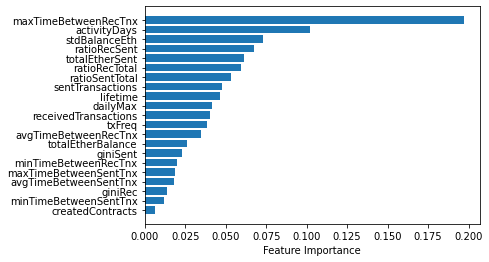

In [48]:
sort = RF.feature_importances_.argsort()
plt.barh(norm_df.columns[sort], RF.feature_importances_[sort])
plt.xlabel("Feature Importance")

**XGB Classifier**

[04:15:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1400
           1       0.94      0.94      0.94      1030

    accuracy                           0.95      2430
   macro avg       0.95      0.95      0.95      2430
weighted avg       0.95      0.95      0.95      2430

[[1335   65]
 [  64  966]]


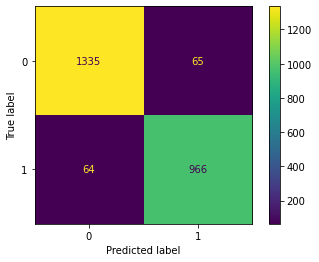

In [49]:
xgb_c = xgb.XGBClassifier(random_state=42)
xgb_c.fit(x_tr_resample, y_tr_resample)
preds_xgb = xgb_c.predict(norm_test_f)

print(classification_report(y_test, preds_xgb))
print(confusion_matrix(y_test, preds_xgb))
plot_confusion_matrix(xgb_c, norm_test_f, y_test)

The results of XGBClassifier shows that its doing slightly better than the RF when it comes to NON-FRAUD transactions, flagging 22 cases as fraud when they were actually non-fraud.

Wen it comes to identifiying FRAUDS, XGBClassifier missed 16 transactions out of 422, suggesting the best recall score.

Considering that, the XGBClassifier is the choice that we want.

Let's see if we can improve thesis results.

**Feature Importance in Random XGB Classifier**
link:https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable.

Text(0.5, 0, 'Feature Importance')

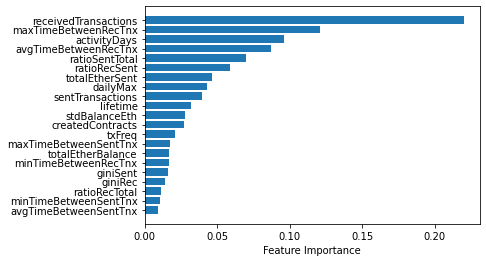

In [50]:
sort = xgb_c.feature_importances_.argsort()
plt.barh(norm_df.columns[sort], xgb_c.feature_importances_[sort])
plt.xlabel("Feature Importance")

**Hyperparameters tuning for XGB Classifier**

In [51]:
# params_grid = {'learning_rate':[0.01, 0.1, 0.5],
#               'n_estimators':[100,200],
#               'subsample':[0.3, 0.5, 0.9],
#                'max_depth':[2,3,4],
#                'colsample_bytree':[0.3,0.5,0.7]}

# grid = GridSearchCV(estimator=xgb_c, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

# grid.fit(x_tr_resample, y_tr_resample)
# print(f'Best params found for XGBoost are: {grid.best_params_}')
# print(f'Best recall obtained by the best params: {grid.best_score_}')

In [52]:
# preds_best_xgb = grid.best_estimator_.predict(norm_test_f)
# print(classification_report(y_test, preds_best_xgb))
# print(confusion_matrix(y_test, preds_best_xgb))
# plot_confusion_matrix(grid.best_estimator_, norm_test_f, y_test)

The confusion matrix shows no improvemet, the results are very similar with those obtained by the untuned model.

In [53]:
# # Plotting AUC for untuned XGB Classifier
# probs = xgb_c.predict_proba(norm_test_f)
# pred = probs[:,1]
# fpr, tpr, threshold = roc_curve(y_test, pred)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(12,8))
# plt.title('ROC for tuned XGB Classifier')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0,1], [0,1], 'r--')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [54]:
# # Save the model for further use
# pickle_out = open('XGB_FRAUD.pickle', 'wb')
# pickle.dump(xgb_c, pickle_out)
# pickle_out.close()

# SVM Classifier

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
cols = X_test.columns
x_tr_resample = pd.DataFrame(x_tr_resample, columns=[cols])
x_test = pd.DataFrame(X_test, columns=[cols])
x_tr_resample.describe()

,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,avgTimeBetweenRecTnx,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
count,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,...,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000,11192.000000
mean,-0.024606,-0.052731,0.030407,-0.075069,-0.030388,0.005575,-0.012652,0.016053,0.048763,0.017818,...,-0.037486,-0.027215,-0.001286,0.012924,-0.023048,-0.015227,0.024948,-0.012796,0.020081,-0.055169
std,0.978109,1.000661,0.978047,0.984878,0.995971,0.997343,0.986788,0.986149,0.981920,1.000343,...,0.981652,1.003990,0.931777,0.993277,0.983986,1.012721,1.010047,0.991082,0.985234,0.981694
min,-1.357674,-1.539394,-1.184613,-1.428290,-1.177094,-1.827183,-0.405499,-1.104668,-1.684520,-1.661383,...,-2.083089,-1.314021,-57.140765,-1.080743,-1.361669,-1.306155,-0.817848,-1.398366,-1.149277,-1.435799
25%,-0.861714,-0.964949,-0.753311,-0.914164,-1.177094,-1.045048,-0.405499,-0.961814,-0.742618,-0.874716,...,-0.790811,-1.314021,-0.009700,-1.080743,-0.919195,-1.306155,-0.817848,-1.054119,-1.087342,-0.980574
50%,-0.172669,-0.010701,-0.262163,-0.187837,0.152956,0.594256,-0.405499,-0.188644,0.001424,0.318448,...,-0.091714,0.311935,-0.009696,0.203534,-0.189754,0.276253,-0.817848,0.144279,-0.006033,-0.095823
75%,0.740759,0.761981,0.695310,0.782911,0.966865,0.617280,-0.405499,0.875074,0.934417,0.815179,...,0.658934,0.739257,-0.009695,0.790278,0.696004,0.757446,1.101285,0.742247,0.865873,0.858988
max,1.971895,2.275476,2.102999,2.102988,1.428974,0.623437,2.473095,2.012768,1.530713,1.324870,...,1.909159,2.264174,39.982461,2.154959,2.046506,2.908005,1.878978,1.866869,2.218368,1.544395


In [57]:
df

,flag,dailyMax,lifetime,ratioRecSent,activityDays,giniSent,maxTimeBetweenRecTnx,createdContracts,stdBalanceEth,ratioRecTotal,...,receivedTransactions,maxTimeBetweenSentTnx,totalEtherBalance,minTimeBetweenRecTnx,txFreq,avgTimeBetweenSentTnx,minTimeBetweenSentTnx,giniRec,totalEtherSent,ratioSentTotal
address,,,,,,,,,,,,,,,,,,,,,
0xd0cc2b24980cbcca47ef755da88b220a82291407,1,60,46,0.313433,10,0.969121,1.501076e+09,0,147.701484,0.238636,...,21,2387389.0,0.291940,89.0,1.891304,5.807655e+04,0.0,0.888782,366.921190,0.750000
0x4cdc1cba0aeb5539f2e0ba158281e67e0e54a9b1,1,1,35,2.000000,2,0.000000,1.502802e+09,0,0.005000,0.666667,...,2,0.0,0.013541,3021091.0,0.057143,0.000000e+00,0.0,0.238480,0.000000,0.000000
0x00e01a648ff41346cdeb873182383333d2184dd1,1,16,299,1.375000,14,0.465450,1.500397e+09,0,52.129575,0.578947,...,22,25112882.0,0.266494,0.0,0.123746,1.710279e+06,37.0,0.614205,199.950000,0.394737
0x858457daa7e087ad74cdeeceab8419079bc2ca03,1,67,36,1.009091,36,0.957906,1.500037e+09,0,233.689231,0.502262,...,111,642460.0,0.007419,0.0,6.111111,1.576106e+04,0.0,0.794121,1630.570000,0.493213
0x240e125c20a4cc84bd6e7f8d1fd07aff4c06d43d,1,3,82,2.000000,3,0.000000,1.500402e+09,0,0.757788,0.666667,...,4,0.0,0.002199,3894.0,0.060976,0.000000e+00,0.0,0.406556,1.900000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x38e404b6ca4549988ced1d065330f1f722787924,0,4,25,0.866667,24,0.643490,1.656129e+09,0,0.236468,0.464286,...,13,15139.0,0.009248,698.0,1.080000,1.186571e+03,3.0,0.615051,3.094515,0.500000
0x8f40dac94ac52f90218d9aa5e605fe39dabe3979,0,3,149,0.166667,136,0.856372,1.648939e+09,0,0.617016,0.142857,...,20,411419.0,-1.600064,0.0,0.932886,2.206761e+04,0.0,0.289923,16.220988,0.850000
0xb92027b6adee9f63290a5a1bd9d15d6a163f4012,0,296,48,528.000000,41,0.000000,4.086570e+05,1,0.000000,0.996226,...,528,0.0,0.000000,0.0,11.020833,0.000000e+00,0.0,0.000000,0.000000,0.000000


In [58]:
from sklearn.svm import SVC
svc = SVC(gamma=0.001, C=100., kernel = 'linear')

svc.fit(x_tr_resample, y_tr_resample)

SVC(C=100.0, gamma=0.001, kernel='linear')

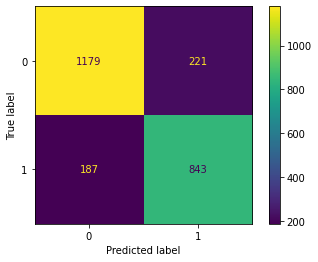

In [59]:
x_test_norm = norm.transform(X_test)
plot_confusion_matrix(svc, x_test_norm, y_test)

Feature importance for SVM
https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

<AxesSubplot:>

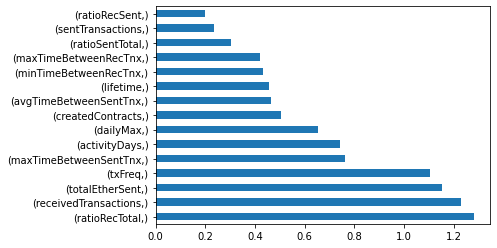

In [60]:
pd.Series(abs(svc.coef_[0]), index=x_tr_resample.columns).nlargest(15).plot(kind='barh')

# K-Nearest Neighoburs

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [62]:
knn.fit(x_tr_resample, y_tr_resample)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1400
           1       0.83      0.83      0.83      1030

    accuracy                           0.86      2430
   macro avg       0.85      0.85      0.85      2430
weighted avg       0.86      0.86      0.86      2430



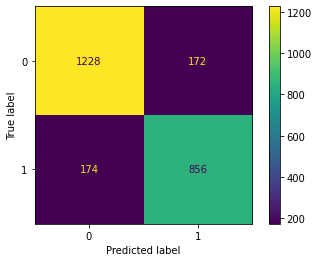

In [63]:
preds_kn = knn.predict(norm_test_f)
print(classification_report(y_test, preds_kn))
plot_confusion_matrix(knn, x_test_norm, y_test)